# Time Series Forecasting : 

Learn Time series analysis and build your first time series forecasting model using ARIMA, Holt’s Winter and other time series forecasting methods in Python for a real-life industry use case

What is Time Series Analysis?
Time Series Forecasting involves working on time (years, days, hours, minutes) based data, to derive hidden insights to make informed decision making.

Importance of Time Series Analysis
Time series models are very useful models when you have serially correlated data as shown above. Most businesses work on time series data to analyze 
Sales numbers for the next year 
Website Traffic
Competition Position
Demand of products
Stock Market Analysis
Census Analysis
Budgetary Analysis

# Introduction to Time Series 

In [1]:
#Time Series is generally data which is collected over time and is dependent on it.
#Most of business houses work on time series data to analyze sales number for the next year, website traffic, count of traffic, number of calls received, etc.
#Data of a time series can be used for forecasting.

In [2]:
#Components of a Time Series :

#Trend - Trend is a general direction in which something is developing or changing.
#Seasonality : Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality. 

# Problem Statement

Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

# Hypothesis Generation 

In [3]:
#Traffic : Days increases , more users.
#weekdays : more user in weekdays.
#peak hours : more traffic in peak hours.
#may to october : high traffic as vacation season

# Loading Data and libraries 

In [4]:
import os
import pandas as pd   
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 

from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 

import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [5]:
print(os.listdir())

['.ipynb_checkpoints', 'GROUPby.csv', 'Test_0qrQsBZ.csv', 'Time Series Forecasting using python.ipynb', 'Train_SU63ISt.csv']


In [6]:
train_original=pd.read_csv("Train_SU63ISt.csv")
test_original=pd.read_csv("Test_0qrQsBZ.csv")

In [7]:
train=train_original.copy()
test=test_original.copy()

# Data Structure and Content

In [8]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [9]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [10]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [11]:
print(train.shape)
print(test.shape)

(18288, 3)
(5112, 2)


# Feature Extraction 

In [12]:
#We will extract date time from datetime.
#we have to convert Datetime from object data type to datetime type as without it we cant extract date and time out of it.

train['Datetime']=pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')

In [13]:
#We made some hypothesis for the effect of hour, day, month and year on the passenger count.
#So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.

for i in(train,test):
    i['Year']=i['Datetime'].dt.year
    i['Month']=i['Datetime'].dt.month
    i['Day']=i['Datetime'].dt.day
    i['Hour']=i['Datetime'].dt.hour
    i['Day of week']=i['Datetime'].dt.dayofweek
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [14]:
#Now,considering our hypothesis  :
#weekdays will have more traffic.
#So, in our dataset if their is weekdays i.e day of week=1,2,3,4,5 put 1 else 0.

def checkweekday(i):
    if i==6 or i==7:
        return 0
    else:
        return 1
    
train['isWeekday']=train['Day of week'].apply(checkweekday)
train.head(2)

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week,isWeekday
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1


In [15]:
#set datetiem as index
train.index=train['Datetime']

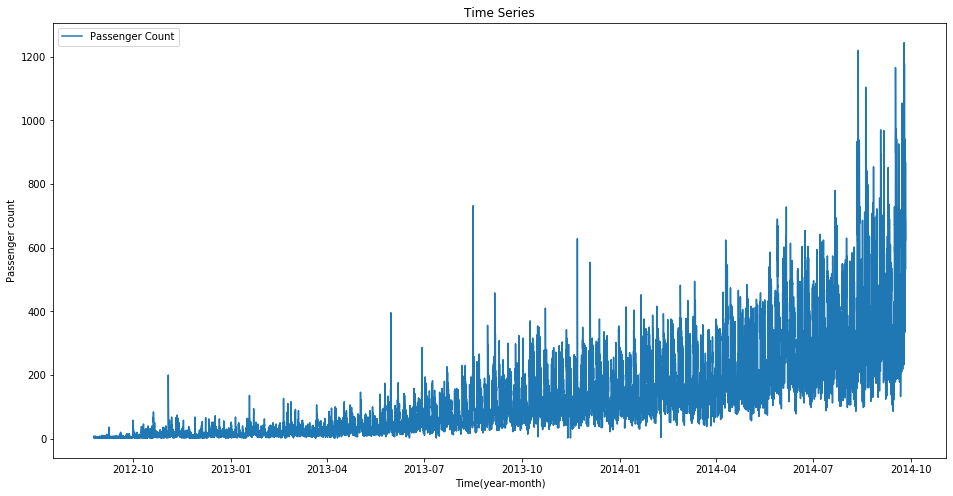

In [16]:
plt.figure(figsize=(16,8)) 
plt.plot(train['Count'], label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

We will work on the train file for all the analysis and will use the test file for forecasting.

# Exploratory analysis (Univariate analysis and Bivariate analysis)

In [17]:
#Let us try to verify our hypothesis using the actual data.

 #Traffic will increase as the years pass by 
 #Traffic will be high from May to October
 #Traffic on weekdays will be more
 #Traffic during the peak hours will be high`

In [18]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week,isWeekday
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


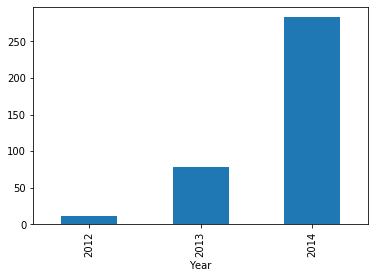

In [19]:
#Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.
train.groupby('Year')['Count'].mean().plot.bar()

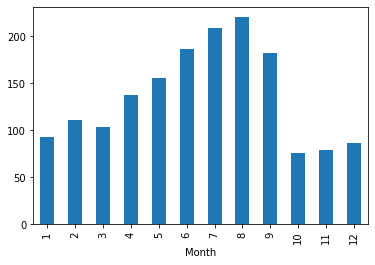

In [20]:
#Traffic will be high from May to October(Month=5,6,7,8,9,10)
train.groupby("Month")['Count'].mean().plot.bar()
#Our hypothesis says that 10 month should also have high count but wrong.

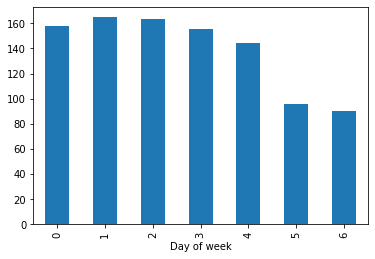

In [21]:
#Our hypothesis says that weekdays should have more count.
train.groupby("Day of week")['Count'].mean().plot.bar()

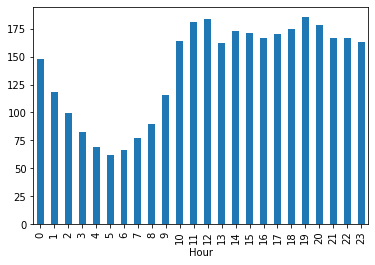

In [22]:
#Our hypothesis says that peak hours should have more count.
train.groupby("Hour")['Count'].mean().plot.bar()

In [23]:
train.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week,isWeekday
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [24]:
train['Timestamp'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')
train.index = train['Timestamp'] 
# Converting to daily mean 
train = train.resample('D').mean()

In [25]:
train.head()

,ID,Count,Year,Month,Day,Hour,Day of week,isWeekday
Timestamp,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,0.0
2012-08-27,59.5,2.583333,2012.0,8.0,27.0,11.5,0.0,1.0
2012-08-28,83.5,2.416667,2012.0,8.0,28.0,11.5,1.0,1.0
2012-08-29,107.5,2.500000,2012.0,8.0,29.0,11.5,2.0,1.0


# Spliting data into training and validation 

Now we will divide our data in train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.

In [26]:
#The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

Train=train.loc['2012-08-25':'2014-06-24']    
Valid=train.loc['2014-06-25':'2014-09-25']    #last 3 months as validate data

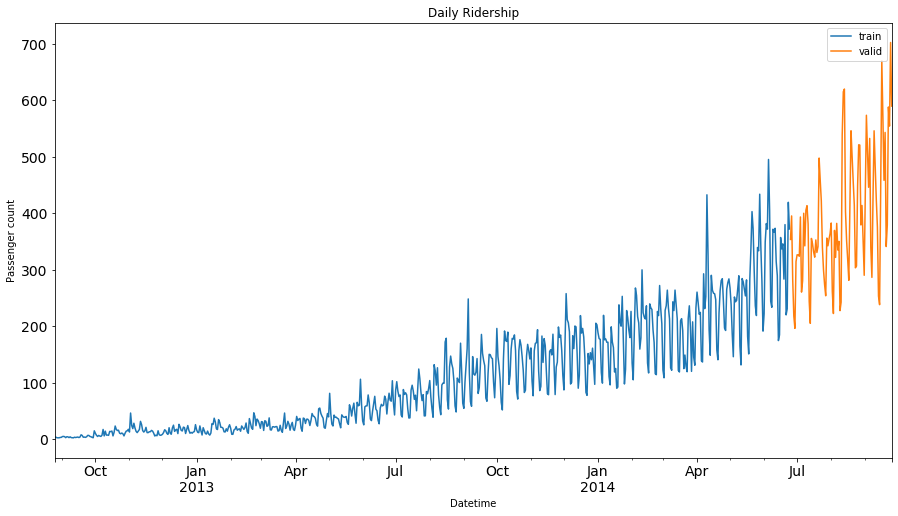

In [27]:
#checking how our data is f=divided correctly or not.
Train['Count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
Valid['Count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime")
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

# Modelling Techniques

We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

i) Naive Approach
ii) Moving Average
iii) Simple Exponential Smoothing
iv) Holt’s Linear Trend Model

# Naive approach :

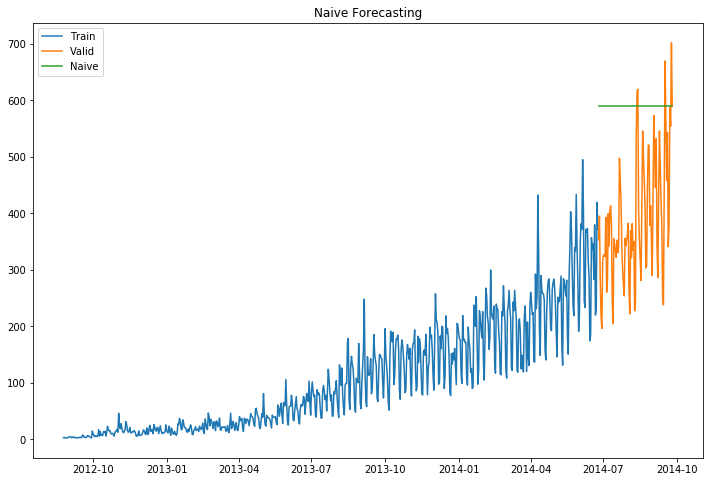

In [28]:
#It says that next prediction will be equal to previous obsevation.Hence,we get a horizontal line.

count_array=np.asarray(train['Count'])
y= Valid.copy()
y['Naive']=count_array[len(count_array)-1]

plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(Valid.index,Valid['Count'],label='Valid')
plt.plot(y.index,y.Naive,label='Naive')
plt.title("Naive Forecasting")
plt.legend(loc='best')
plt.show()

we can check how accurate our model is using RMSE (Root mean square error).

RMSE:
    standard deviation of residuals which are measure of how far from regression line are our data points.
    rmse=sqrt∑i=1N1N(p−a)2

In [29]:
#Lets calculate above model accuracy :
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(Valid.Count, y.Naive)) 
print(rms)
#We can infer that this method is not suitable for datasets with high variability. 
#We can reduce the rmse value by adopting different techniques.

228.80611421731237


# Moving Average Approach :

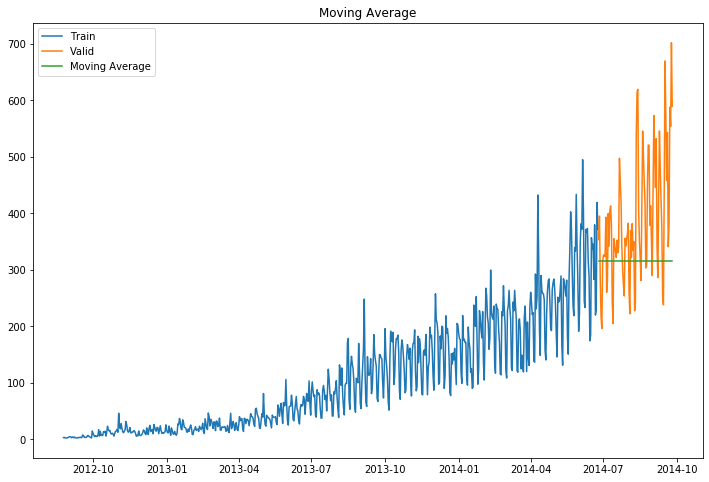

In [30]:
#In this model,we take average of passenger counts over last few time periods.
y=Valid.copy()
y['MovAvg']=Train.Count.rolling(25).mean().iloc[-1]    #plot it using first 25 observations.

plt.figure(figsize=(12,8))
plt.plot(Train.index,Train.Count,label="Train")
plt.plot(Valid.index,Valid.Count,label="Valid")
plt.plot(y.index,y.MovAvg,label='Moving Average')
plt.title("Moving Average")
plt.legend(loc="best")
plt.show()

In [31]:
#calculating accuracy
rms=sqrt(mean_squared_error(Valid.Count,y.MovAvg))
print(rms)

132.25462585292883


# Simple Exponential Approach 

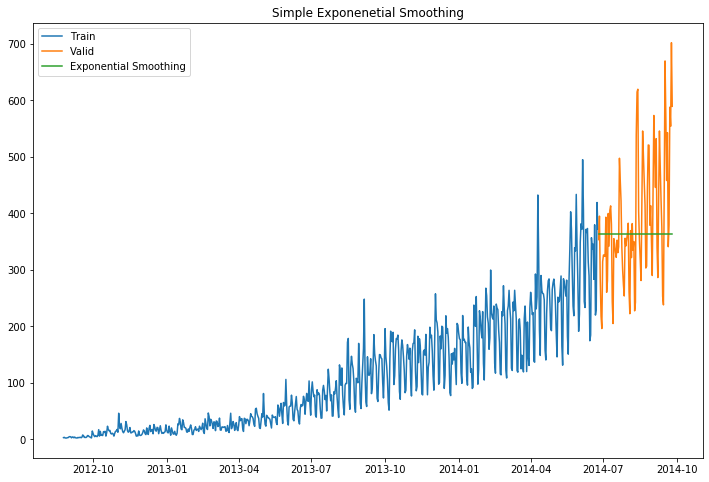

In [32]:
#We assign larger weight to recent observation and smaller weights to oldest observations.
#NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach.
#So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y= Valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) #less smoothing_level,more rmse.
y['SimExpSmo'] = fit2.forecast(len(Valid)) 

plt.figure(figsize=(12,8))
plt.plot(Train.index,Train.Count,label="Train")
plt.plot(Valid.index,Valid.Count,label="Valid")
plt.plot(y.index,y.SimExpSmo,label='Exponential Smoothing')
plt.title("Simple Exponenetial Smoothing")
plt.legend(loc="best")
plt.show()

In [33]:
#checking its accuracy
rms=sqrt(mean_squared_error(Valid.Count,y.SimExpSmo))
print(rms)
#We can infer that the fit of the model has improved as the rmse value has reduced.

113.43708111884514


# Holt's Linear Trend Model 

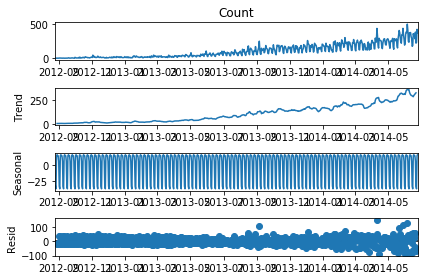

In [34]:
#It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
#This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

#We can decompose the time series in four parts.

#Observed, which is the original time series.
#Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
#Seasonal, which tells us about the seasonality in the time series.
#Residual, which is obtained by removing any trend or seasonality in the time series.

#Lets visualize all these parts.
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

C:\Users\A105682478\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


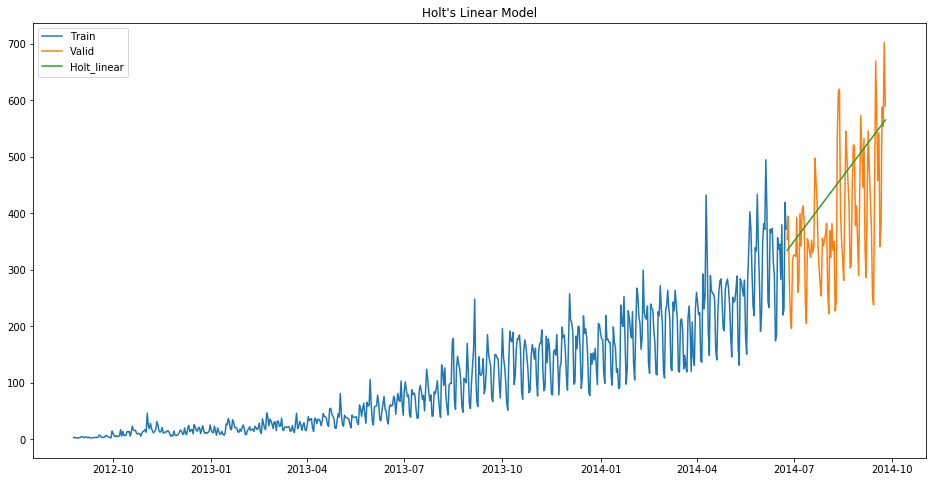

In [35]:
#An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

y = Valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y['Holt_linear'] = fit1.forecast(len(Valid)) 

plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(y['Holt_linear'], label='Holt_linear') 
plt.title("Holt's Linear Model")
plt.legend(loc='best') 
plt.show()

In [36]:
#We can see an inclined line here as the model has taken into consideration the trend of the time series.

#Let’s calculate the rmse of the model.
rms = sqrt(mean_squared_error(Valid.Count, y.Holt_linear)) 
print(rms)

#It can be inferred that the rmse value has decreased.

112.94278345314041


# Holt Winter's  Model on daily time series

Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.
The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.
One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.


C:\Users\A105682478\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\A105682478\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


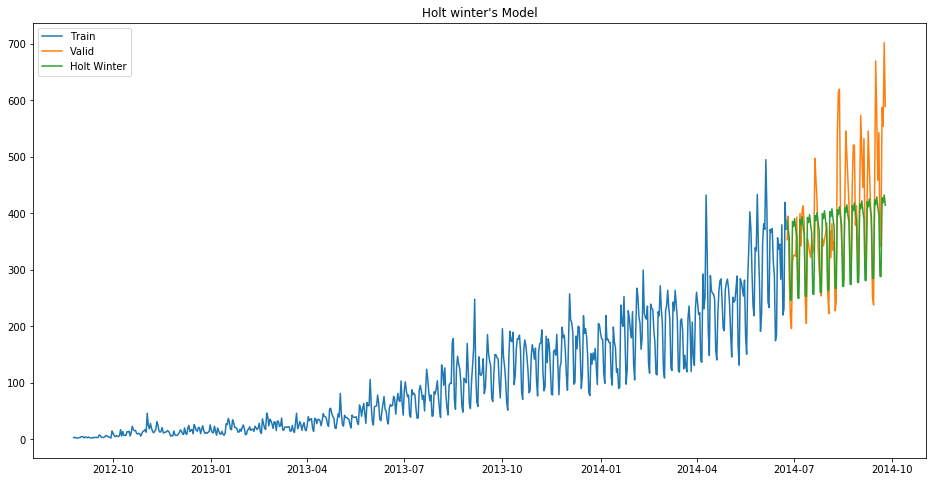

In [38]:
y=Valid.copy()
fit_1= ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y['Holt_Winter']=fit_1.forecast(len(Valid))

plt.figure(figsize=(16,8))
plt.plot(Train.index,Train.Count,label="Train")
plt.plot(Valid.index,Valid.Count,label="Valid")
plt.plot(y.index,y.Holt_Winter,label="Holt Winter")
plt.title("Holt winter's Model")
plt.legend(loc="best")

In [40]:
#checking accuracy :
rmse=sqrt(mean_squared_error(Valid.Count,y.Holt_Winter))
print(rmse)

82.38041226792582


# ARIMA Model 

ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

Here p is the order of the autoregressive model(number of time lags)
d is the degree of differencing(number of times the data have had past values subtracted)
q is the order of moving average model.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.

What is a stationary time series?
There are three basic criterion for a series to be classified as stationary series :
- The mean of the time series should not be a function of time. It should be constant.
- The variance of the time series should not be a function of time.
- THe covariance of the ith term and the (i+m)th term should not be a function of time.

Why do we have to make the time series stationary?
- We make the series stationary to make the variables independent. Variables can be dependent in various ways,
but can only be independent in one way. So, we will get more information when they are independent.Hence the time series must be stationary.
If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data.

Parameter tuning for ARIMA Model :

In [ ]:
#First thing we need to do is make time series stationary if its not.

Stationarity Check
- We use Dickey Fuller test to check the stationarity of the series.
- The intuition behind this test is that it determines how strongly a time series is defined by a trend.
- The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
- The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
- The test results comprise of a Test Statistic and some Critical Values for difference confidence levels.

We interpret this result using the Test Statistics and critical value. 
If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (i.e series is stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).

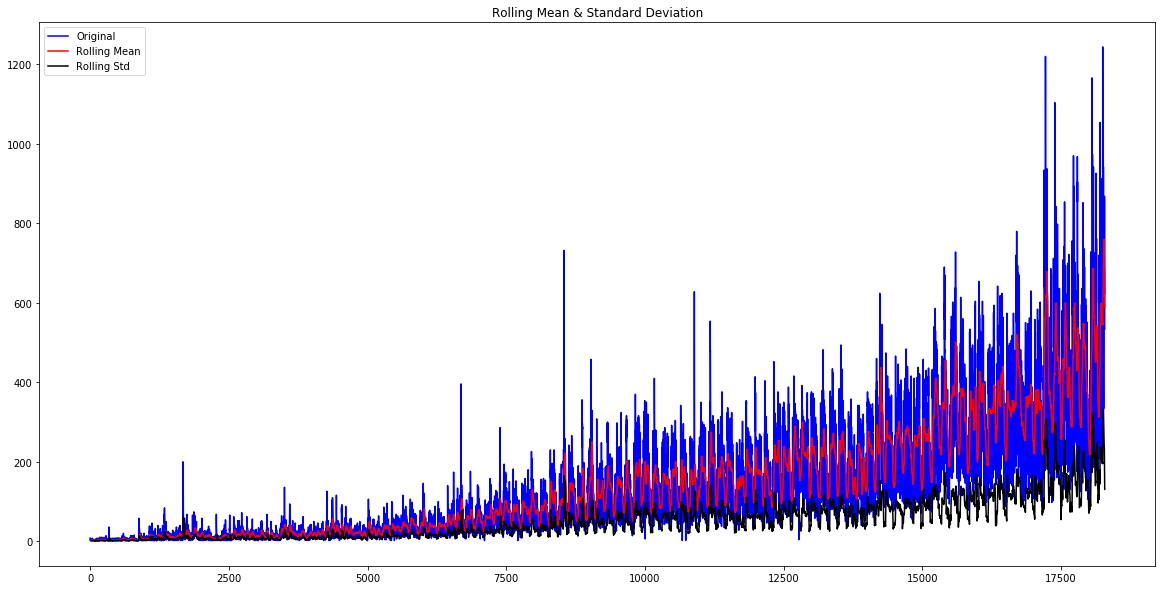

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [61]:
#Let’s make a function which we can use to calculate the results of Dickey-Fuller test.

from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean()   # 24 hours on each day
    rolstd = timeseries.rolling(window=24).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

In [62]:
#Removing Trend

A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

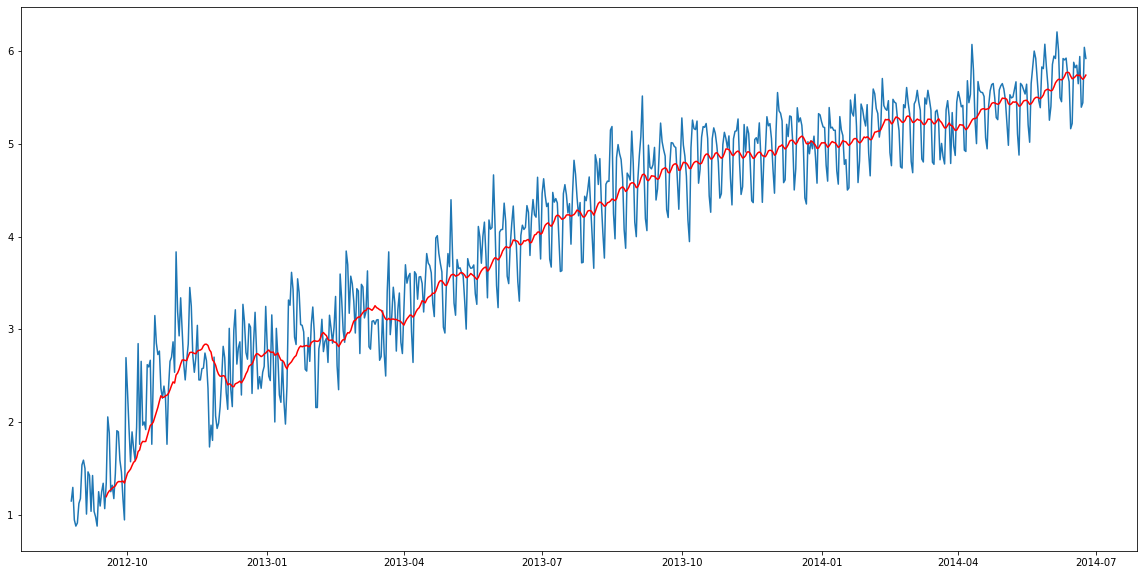

In [65]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(Valid['Count'])
moving_avg = Train_log.rolling(24).mean() 
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

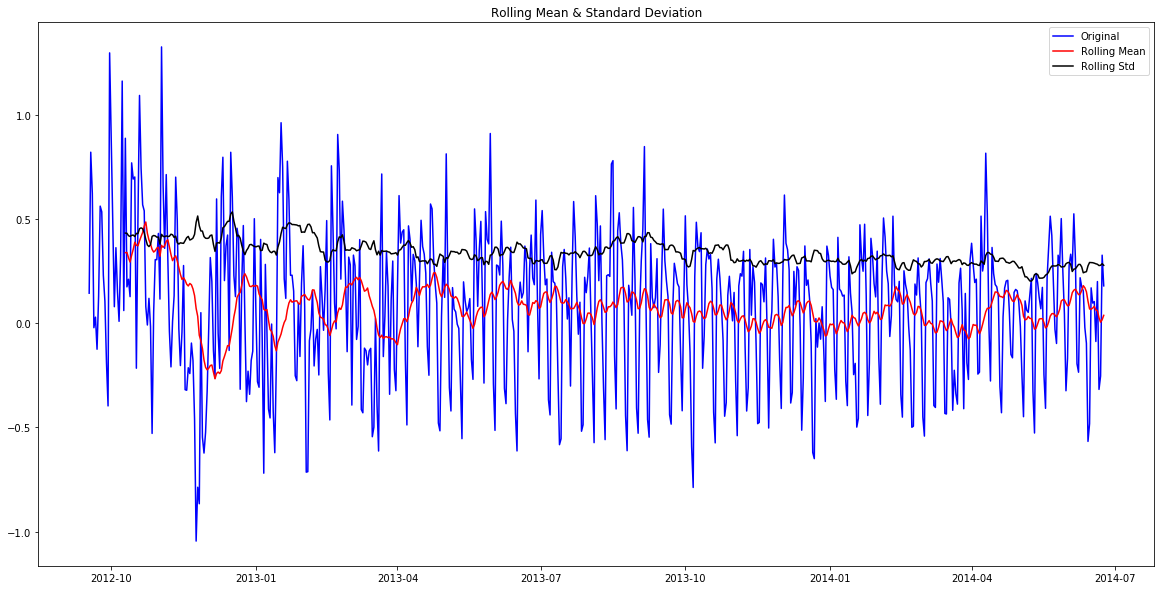

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [66]:
#we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

train_log_moving_avg_diff = Train_log - moving_avg
#Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

In [67]:
#Stabilize mean :
#Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

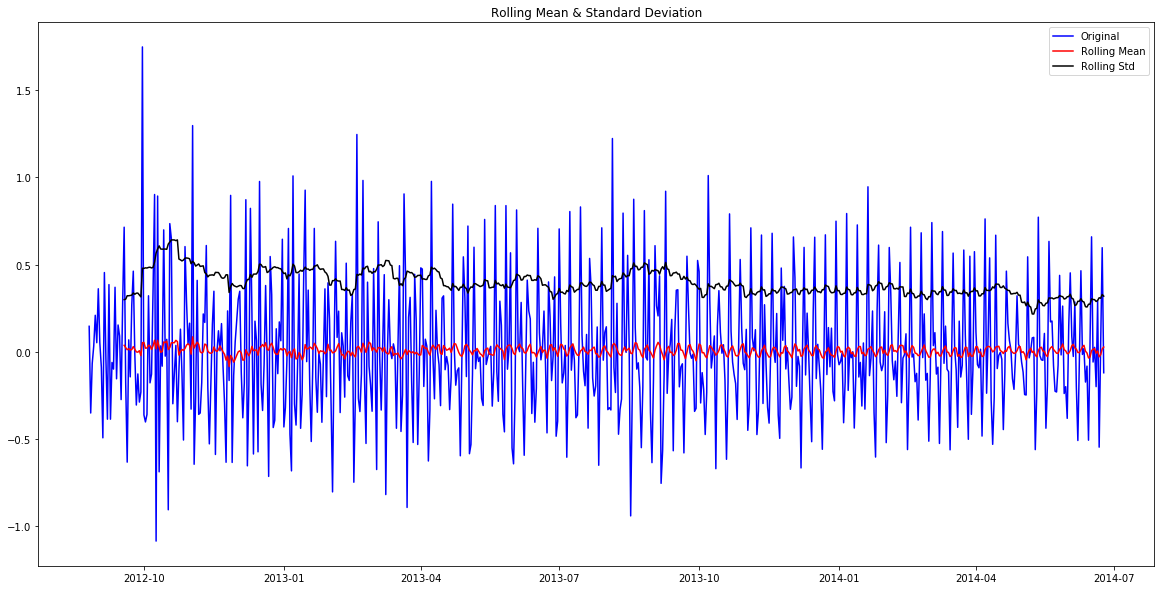

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [68]:
#Differencing can help to make the series stable and eliminate the trend.
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

In [70]:
#Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

In [ ]:
#Removing Seasonality

- By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
- Seasonality is always of a fixed and known period.
- We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

C:\Users\A105682478\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


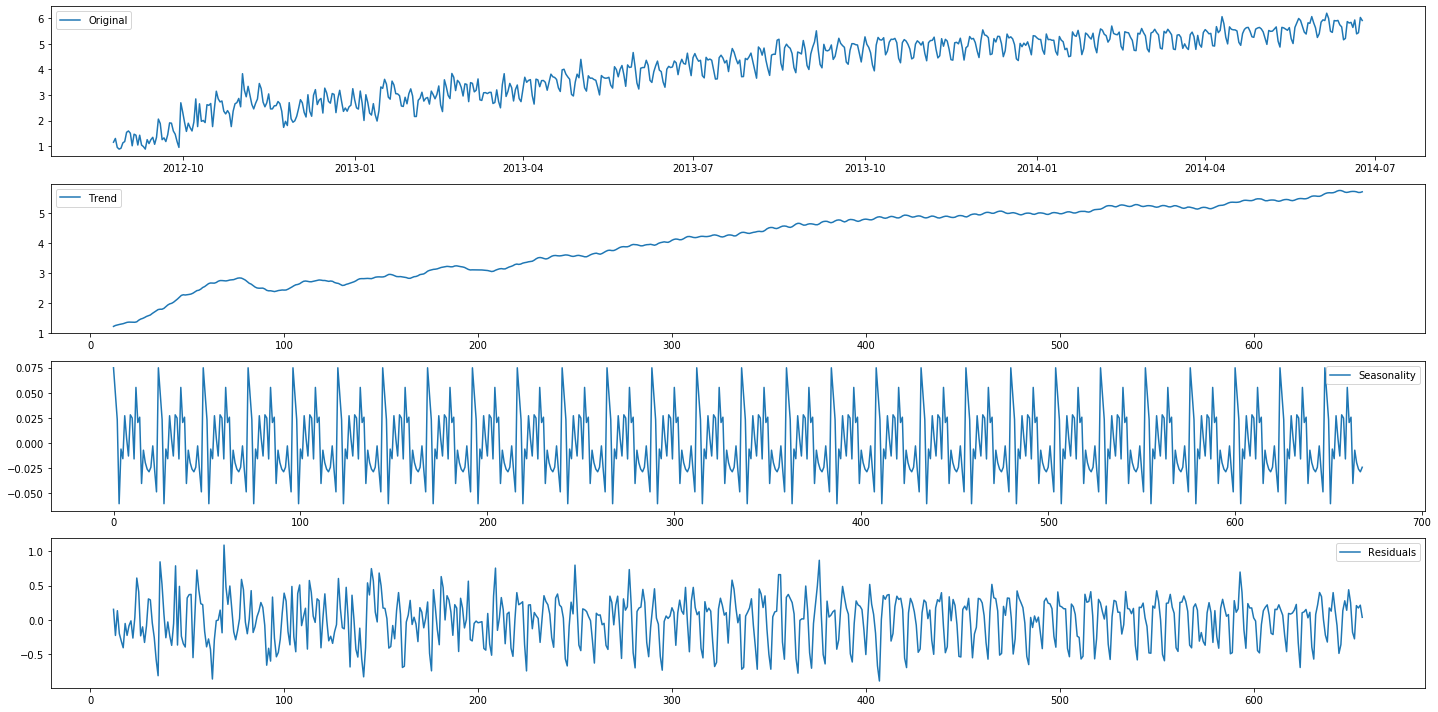

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.

In [73]:
#residuals stationary check :

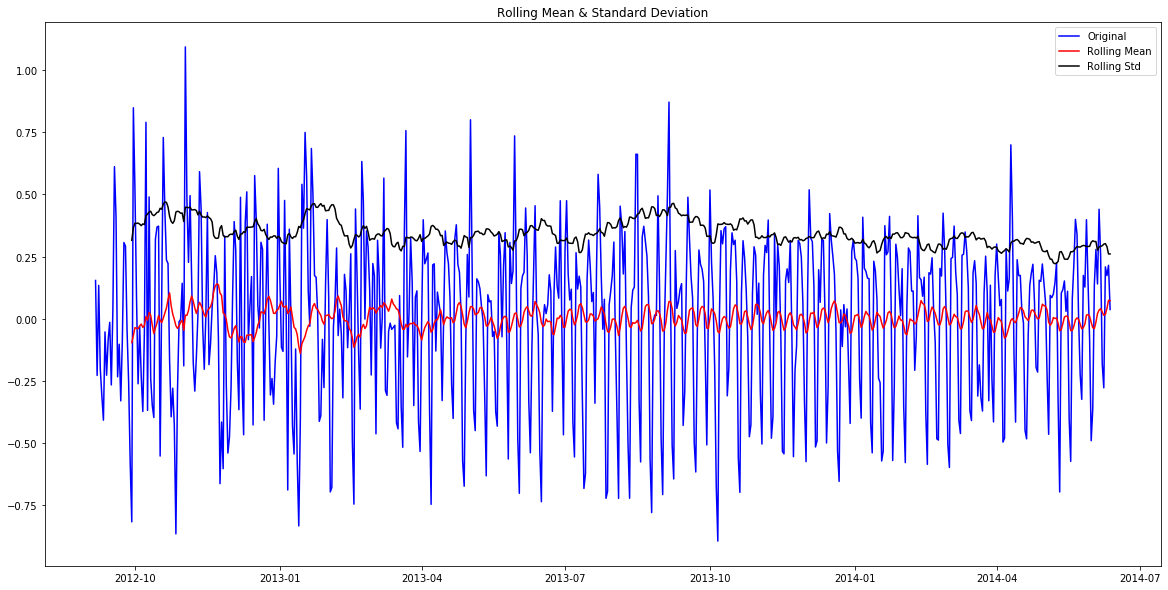

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [75]:
#Let’s check stationarity of residuals.

train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [77]:
#we have made trend,seasonality,residuals all stationary . Now we will forecast our series using arima .

Forecasting the time series using ARIMA
- First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.
- To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.
- ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.
- PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

In [79]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

C:\Users\A105682478\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


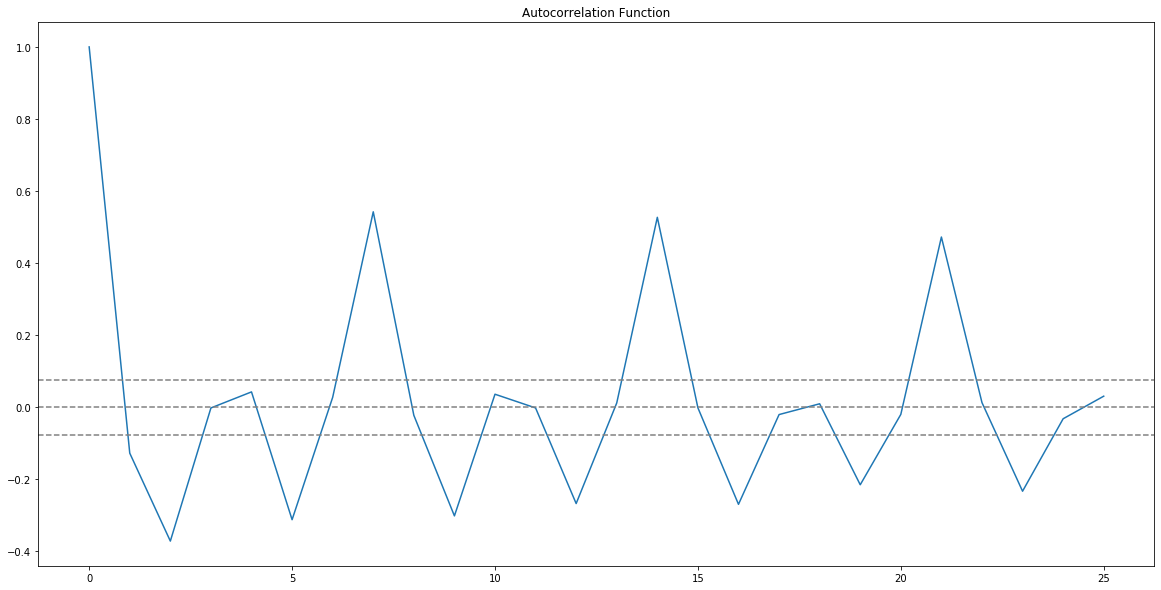

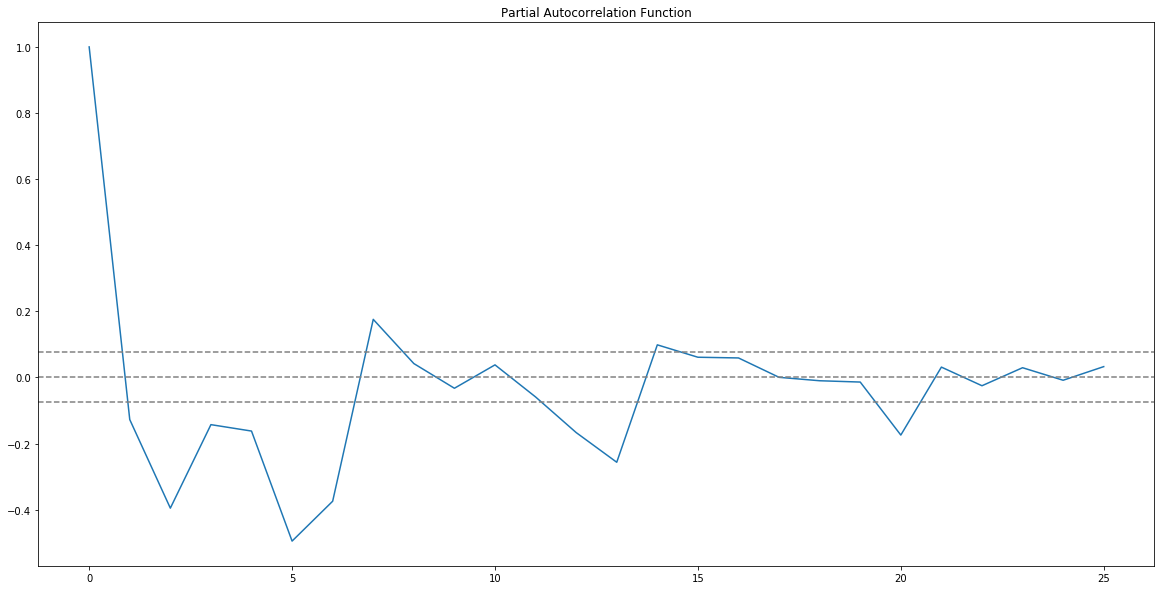

In [82]:
#ACF and PACF plot
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()


- p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.
- q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

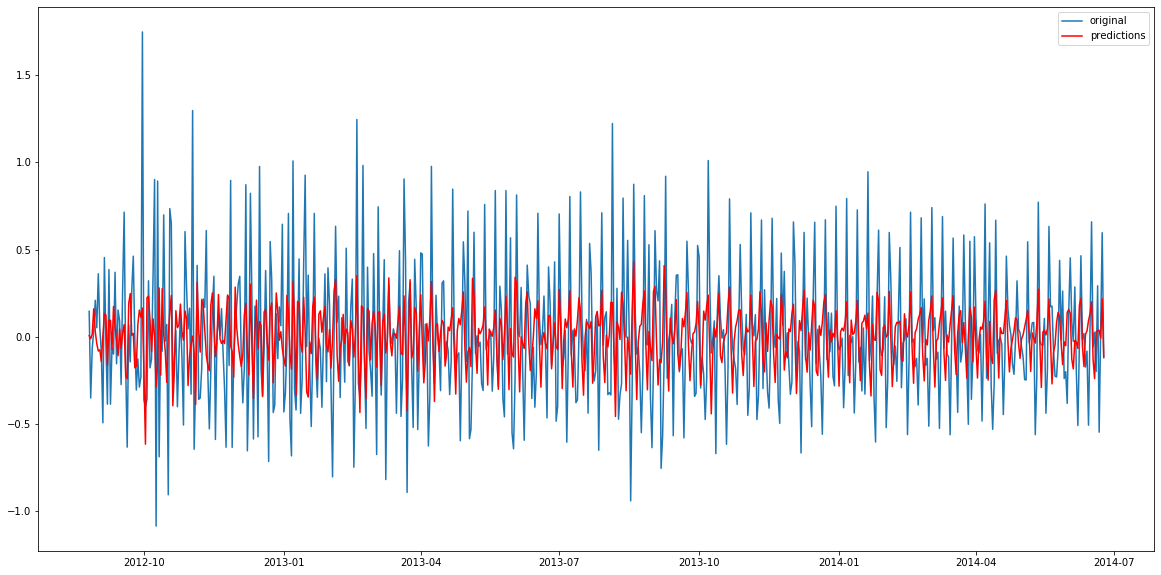

In [83]:
#AR model
#The autoregressive model specifies that the output variable depends linearly on its own previous values.

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()


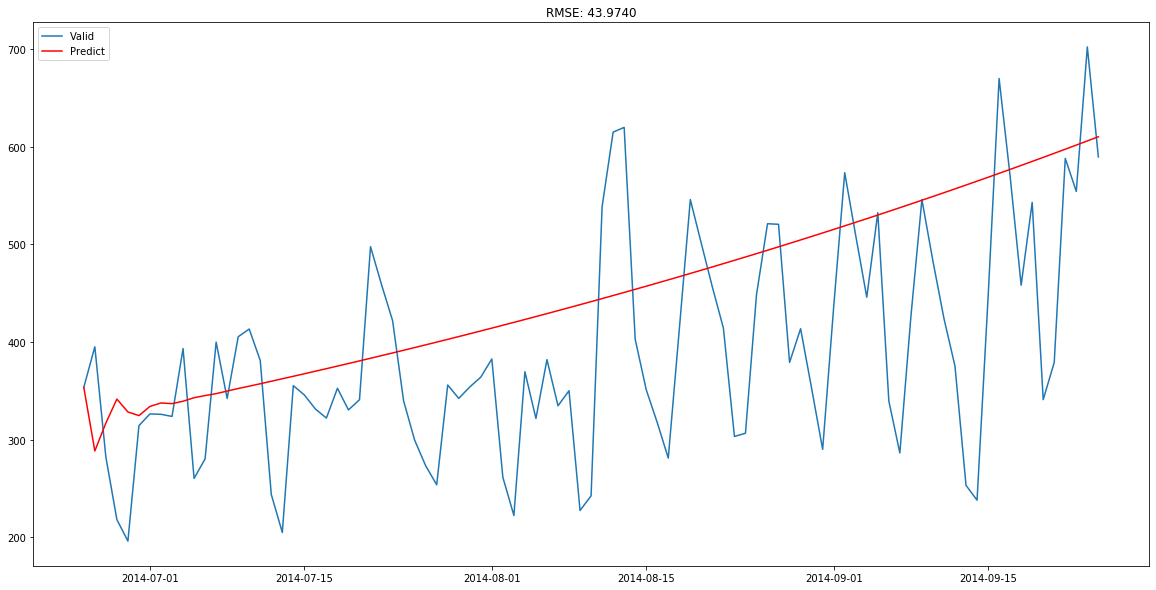

In [92]:
#Lets plot the validation curve for AR model.

#We have to change the scale of the model to the original scale.
#First step would be to store the predicted results as a separate series and observe it.

AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Count'])[0], index = Valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(Valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Valid['Count']))/Valid.shape[0])) 
plt.show()

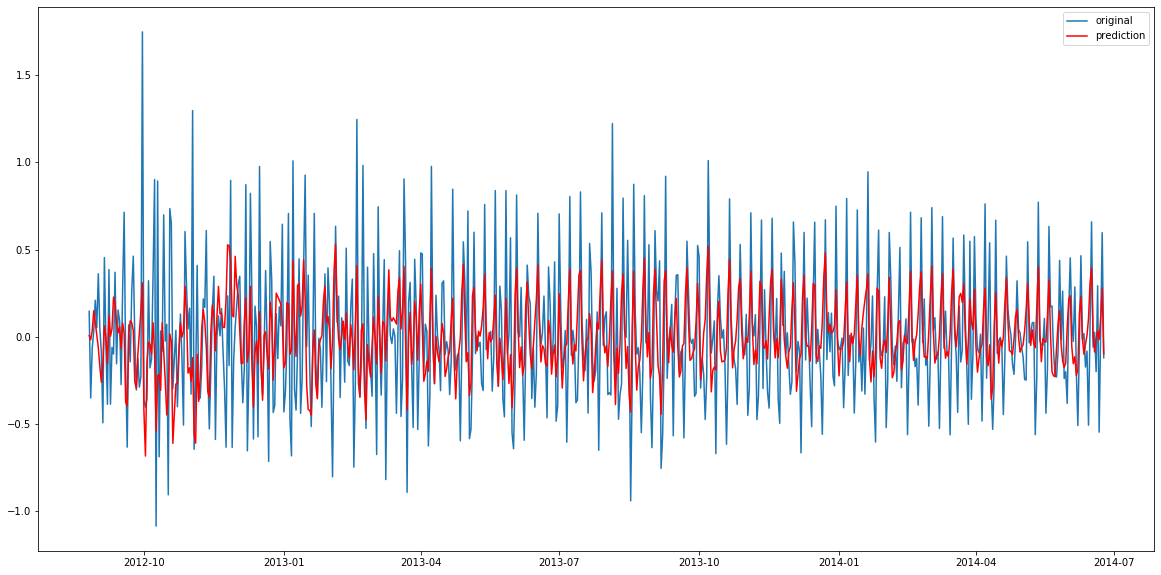

In [93]:
#MA model
#The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

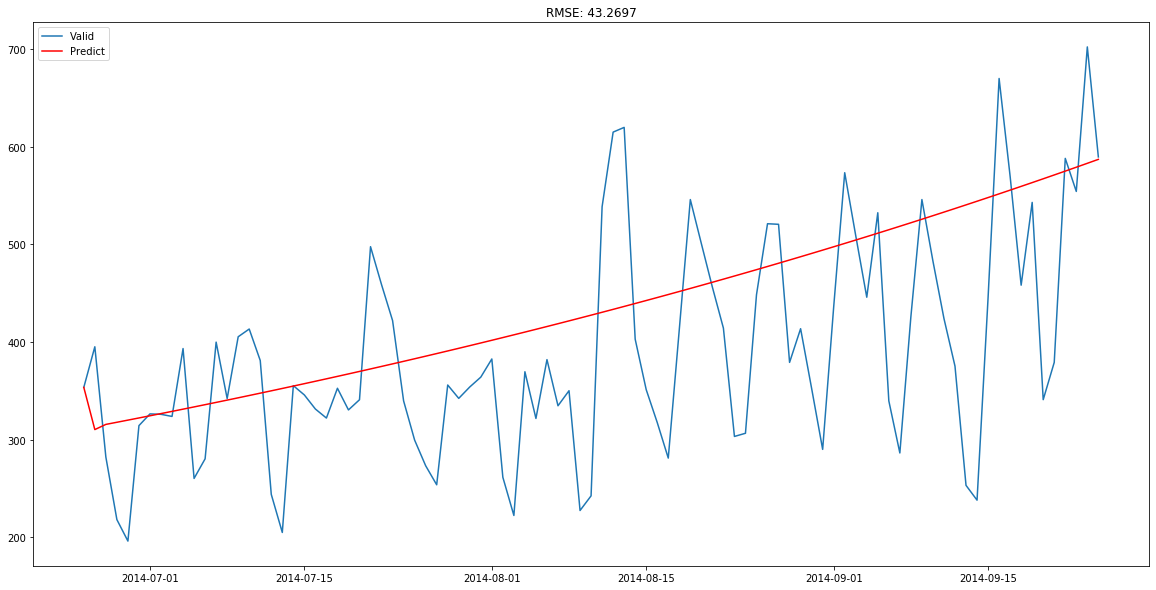

In [94]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0) 
MA_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Count'])[0], index = Valid.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)
plt.plot(Valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, Valid['Count']))/Valid.shape[0])) 
plt.show()

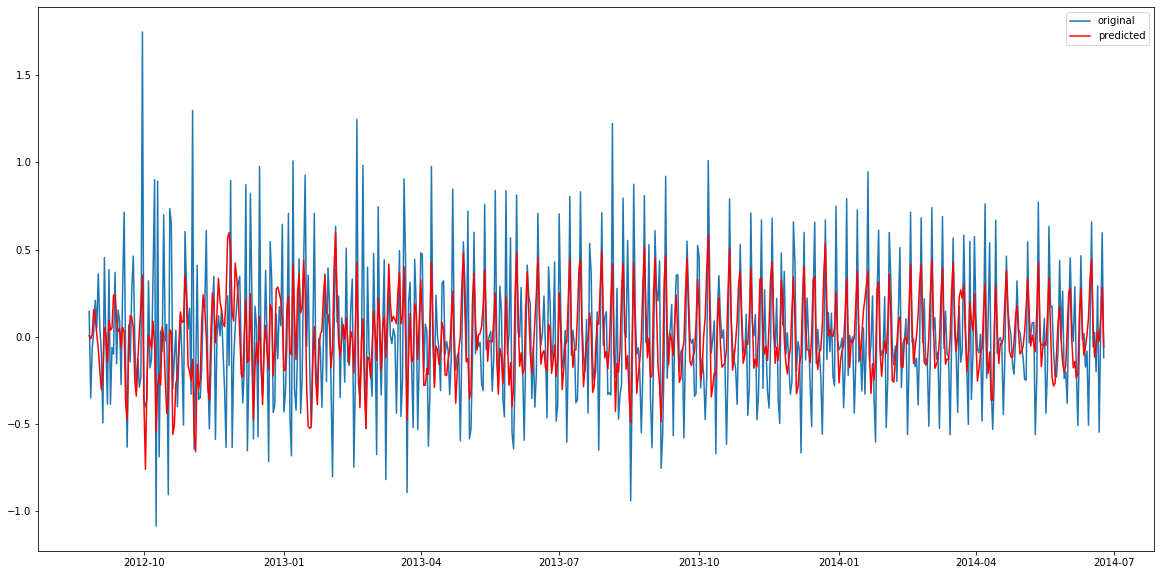

In [95]:
#now let’s combine these two models.

#Combined model

model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

In [97]:
#Let’s define a function which can be used to change the scale of the model to the original scale.

def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

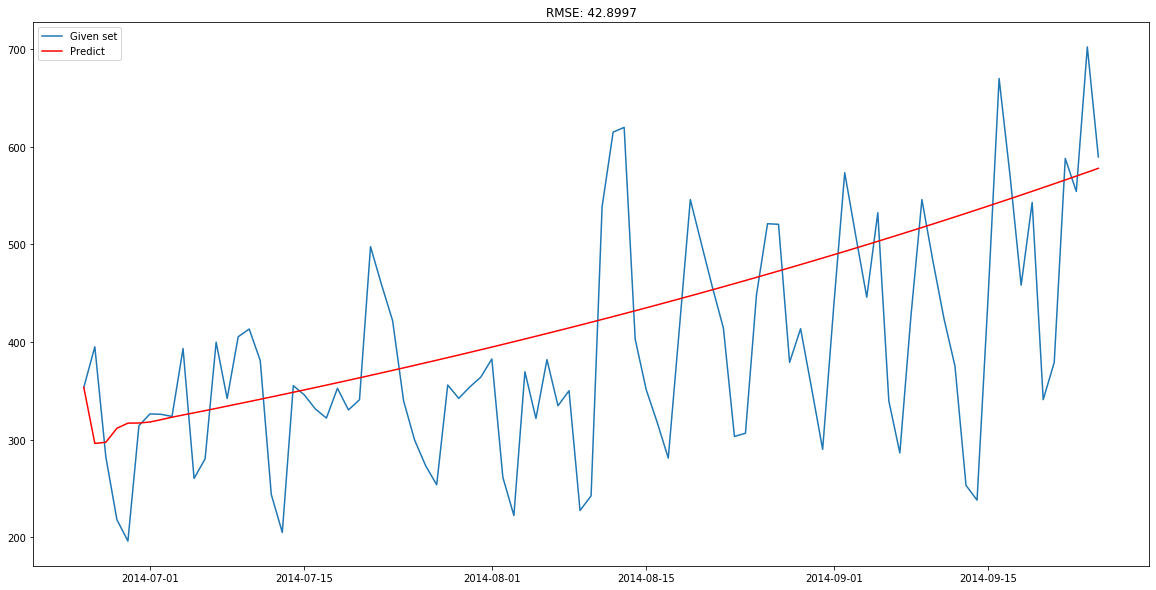

In [99]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, Valid)

# SARIMAX Model 

SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series.

C:\Users\A105682478\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


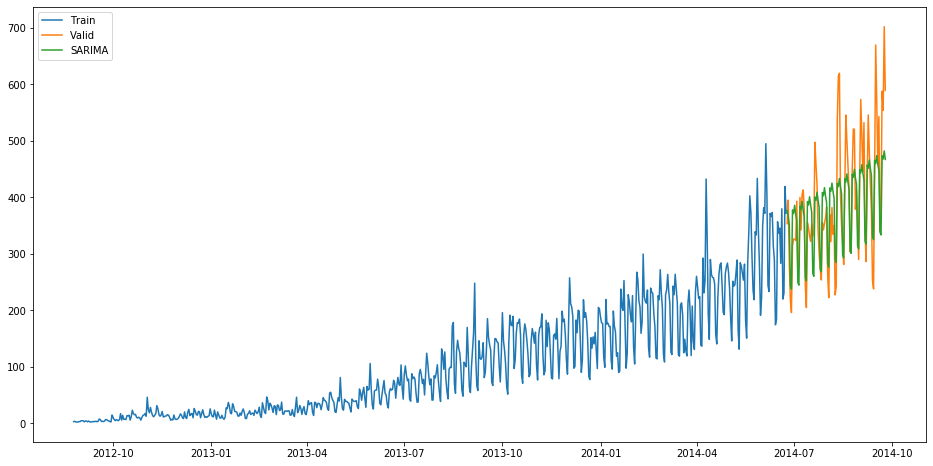

In [102]:
import statsmodels.api as sm
y_hat_avg = Valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

Order in the above model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

In [104]:
rms = sqrt(mean_squared_error(Valid.Count, y_hat_avg.SARIMA)) 
print(rms)

69.67242279085332


Hence,we get the least rmse by SARIMAX Model.